In [48]:
import warnings
warnings.filterwarnings('ignore')

## Playing with words: Comparing several LLM models to DQN in playing simple games
<img src="images/BannerCartPole.png" alt="Alternative text"  style="width: 100%;"/>

## LLM Cartpole experiment data analysis
Project for **IM1102-232433M - Deep Neural Engineering** by:
<center>Johan Weiland 85264426a, Ronald Buit 85252851a, Nicky Lenaers 85211597a, Jelmer de Boer 85253354</center>
<br>

<h3>Introduction</h3>
In the field of automated game-playing, reinforcement learning (RL), and, in particular, Q-learning has garnered wide-claim success. This form of RL utilizes the Q-function, which measures the expected cumulative rewards when taking a particular action in a given state. Deep Q-Networks (DQNs) employ deep neural networks to approximate the Q-function, which has been successfully used for navigating very complex game environments; From classic Atari games to classic board games like Go.

However, in recent years Large Language Models (LLMs), Deep Neural Networks often based on transformer architectures, were more and more able to generate human-like text with increasing fluency and coherence. Models like ChatGPT, Zephyr, and Phi were able to significantly push the boundaries of language generation.

<h3>Experiment</h3>
In our project "Playing with words: Comparing several LLM models to DQN in playing simple games" a Zephyr 3B LLM is used to play the Cartpole gym environment. This game is played with different prompt types and a varying temperature parameter. For each configuration, 100 games are played. The best configuration was selected to compete against the other RL models.

<h3>Model</h3>
For this experiment, Stable LM Zephyr 3B was used. Stable LM Zephyr 3B is a 3 billion parameter Large Language Model (LLM), 60% smaller than 7B models, allowing accurate, and responsive output on a variety of devices without requiring high-end hardware. 
More information on the LLM model Stable LM Zephyr 3B can be found here:<br>
<a href='https://stability.ai/news/stablelm-zephyr-3b-stability-llm'>https://stability.ai/news/stablelm-zephyr-3b-stability-llm</a>

<h3>Prompt engineering</h3>
In this experiment, several prompting techniques were used, shown in the table below.
<img src="images\CartpolePrompts.png" alt="Alternative text"  style="width: 80%;"/>

<h3>Environment Information</h3>
a visual representation of the Cartpole game:
<img src="images\cart_pole.gif" alt="Alternative text"  style="width: 50%;"/>
More information about the Cartpole environment can be found at:<br>
<a href='https://gymnasium.farama.org/environments/classic_control/cart_pole/'>https://gymnasium.farama.org/environments/classic_control/cart_pole/</a>

<h3>Experiment data generation</h3>
Experiment data was gathered by playing 100 games for each parameter and prompt combination, with a random model employed as a baseline for comparison. This data collection process is detailed in the accompanying experiment notebook, accessible here:
<br>
<a href='https://github.com/nicky-lenaers/dne-project/blob/main/src/cartpole/play_cartpole_Zephyr3B.ipynb'>
    https://github.com/nicky-lenaers/dne-project/blob/main/src/cartpole/play_cartpole_Zephyr3B.ipynb</a>

<h3>Workflow To Be Followed</h3>
Step 1: Loading The Dataset<br>
Step 2: Performing Exploratory Data Analysis<br>
Step 3: Visualizing the data<br>

<h1>Step 1: Loading The Dataset</h1>

Importing libraries necessary in this notebook

In [61]:
!pip install -q -U pandas
import pandas as pd
!pip install -q -U seaborn
# some imports to set up plotting
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns
!pip install -q -U plotly
import plotly.graph_objects as go
import numpy as np 

<BR><BR>Loading the dataset

In [62]:
dfCartPoleLLM = pd.read_csv("Data\CartPoleLlm_Total_20240426-115006.csv")
print("Shape:")
print(dfCartPoleLLM.shape)
print("Columns:")
print(dfCartPoleLLM.columns)

Shape:
(1700, 8)
Columns:
Index(['promptKey', 'temperature', 'timesteps', 'rewards', 'leftActions',
       'rightActions', 'randomActions', 'DateTime'],
      dtype='object')


<BR><BR><h1>Step 2: Performing Exploratory Data Analysis</h1>

In [63]:
dfCartPoleLLM.head()

,promptKey,temperature,timesteps,rewards,leftActions,rightActions,randomActions,DateTime
0,zero_shot_prompt,0.1,9,9.0,9,0,0,2024-04-26 11:50:08.284575
1,zero_shot_prompt,0.1,9,9.0,9,0,0,2024-04-26 11:50:08.857468
2,zero_shot_prompt,0.1,10,10.0,10,0,0,2024-04-26 11:50:09.504922
3,zero_shot_prompt,0.1,10,10.0,9,1,1,2024-04-26 11:50:10.562282
4,zero_shot_prompt,0.1,9,9.0,9,0,0,2024-04-26 11:50:11.142881


In [64]:
print(dfCartPoleLLM.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   promptKey      1700 non-null   object 
 1   temperature    1700 non-null   float64
 2   timesteps      1700 non-null   int64  
 3   rewards        1700 non-null   float64
 4   leftActions    1700 non-null   int64  
 5   rightActions   1700 non-null   int64  
 6   randomActions  1700 non-null   int64  
 7   DateTime       1700 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 106.4+ KB
None


In [65]:
dfCartPoleLLM.describe()

,temperature,timesteps,rewards,leftActions,rightActions,randomActions
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.517647,28.045882,28.045882,14.648824,13.397059,1.902353
std,0.350288,18.636298,18.636298,9.116322,10.294172,5.597327
min,0.000000,8.000000,8.000000,0.000000,0.000000,0.000000
25%,0.100000,12.000000,12.000000,9.000000,6.000000,0.000000
50%,0.400000,23.000000,23.000000,11.000000,12.000000,0.000000
75%,0.700000,40.000000,40.000000,20.000000,20.000000,1.000000
max,1.000000,141.000000,141.000000,71.000000,70.000000,80.000000


In [66]:
dfCartPoleLLM.groupby(["promptKey","temperature"]).describe(percentiles=[])

timesteps                                \
                                        count   mean        std   min   50%   
promptKey               temperature                                           
Chain_of_Thought_prompt 0.1             100.0  41.06   8.966627  25.0  40.0   
                        0.4             100.0  41.92   9.545934  24.0  41.0   
                        0.7             100.0  39.19  11.269602  13.0  39.0   
                        1.0             100.0  41.85  15.109951  14.0  39.5   
Random                  0.0             100.0  21.10  10.502044   9.0  17.0   
few_shot_prompt         0.1             100.0  45.91  17.496952  13.0  42.5   
                        0.4             100.0  44.75  22.609274  11.0  43.0   
                        0.7             100.0  41.70  23.437646  11.0  37.0   
                        1.0             100.0  38.01  18.633355  12.0  35.0   
one_shot_prompt         0.1             100.0  20.18  10.734049   8.0  17.5   
                        0.4             100.0  18.96   9.978684   9.0  16.5   
                        0.7             100.0  20.43  10.017414   9.0  18.5   
                        1.0             100.0  20.96  10.773068  10.0  17.0   
zero_shot_prompt        0.1             100.0   9.35   0.770347   8.0   9.0   
                        0.4             100.0  10.22   1.251908   8.0  10.0   
                        0.7             100.0  10.33   1.435868   8.0  10.0   
                        1.0             100.0  10.86   2.113067   8.0  10.0   

                                           rewards                          \
                                       max   count   mean        std   min   
promptKey               temperature                                          
Chain_of_Thought_prompt 0.1           68.0   100.0  41.06   8.966627  25.0   
                        0.4           64.0   100.0  41.92   9.545934  24.0   
                        0.7           84.0   100.0  39.19  11.269602  13.0   
                        1.0           86.0   100.0  41.85  15.109951  14.0   
Random                  0.0           80.0   100.0  21.10  10.502044   9.0   
few_shot_prompt         0.1           89.0   100.0  45.91  17.496952  13.0   
                        0.4          141.0   100.0  44.75  22.609274  11.0   
                        0.7          120.0   100.0  41.70  23.437646  11.0   
                        1.0           99.0   100.0  38.01  18.633355  12.0   
one_shot_prompt         0.1           57.0   100.0  20.18  10.734049   8.0   
                        0.4           67.0   100.0  18.96   9.978684   9.0   
                        0.7           59.0   100.0  20.43  10.017414   9.0   
                        1.0           61.0   100.0  20.96  10.773068  10.0   
zero_shot_prompt        0.1           11.0   100.0   9.35   0.770347   8.0   
                        0.4           17.0   100.0  10.22   1.251908   8.0   
                        0.7           16.0   100.0  10.33   1.435868   8.0   
                        1.0           20.0   100.0  10.86   2.113067   8.0   

                                     ... rightActions                    \
                                     ...          std   min   50%   max   
promptKey               temperature  ...                                  
Chain_of_Thought_prompt 0.1          ...     4.377387  11.0  19.5  32.0   
                        0.4          ...     4.651100  10.0  20.0  31.0   
                        0.7          ...     6.036923   5.0  18.0  39.0   
                        1.0          ...     7.613412   7.0  18.0  44.0   
Random                  0.0          ...     5.603489   1.0  10.0  38.0   
few_shot_prompt         0.1          ...     8.644003   7.0  23.0  43.0   
                        0.4          ...    11.442482   7.0  21.5  70.0   
                        0.7          ...    11.913052   4.0  18.5  61.0   
                        1.0          ...     9.103729   5.0  18.0  49

In [67]:
pivot = dfCartPoleLLM.pivot_table(
    ["timesteps", "leftActions", "rightActions", "randomActions", "rewards"],
    ["promptKey", "temperature"],
    aggfunc={"timesteps": "sum",
             "leftActions": "sum",
             "rightActions": "sum",
             "randomActions": "sum",
             "rewards": "mean"}  # Use "mean" for average instead of "sum"
)

pivot['games'] = 100
pivot['% left'] = (pivot.leftActions / pivot.timesteps *100 )
pivot['% right'] = (pivot.rightActions / pivot.timesteps *100 )
pivot['% random'] = (pivot.randomActions / pivot.timesteps *100 )

# Merge columns into one column in the correct format
pivot['left'] = pivot['leftActions'].astype(str) + ' (' + pivot['% left'].map('{:.1f}'.format).astype(str) + '%)'
pivot['right'] = pivot['rightActions'].astype(str) + ' (' + pivot['% right'].map('{:.1f}'.format).astype(str) + '%)'
pivot['random'] = pivot['randomActions'].astype(str) + ' (' + pivot['% random'].map('{:.1f}'.format).astype(str) + '%)'

pivotOrdered = pivot[["games", "timesteps", "left", 'right', "random", "rewards"]].copy()
pivotOrdered

games  timesteps          left  \
promptKey               temperature                                   
Chain_of_Thought_prompt 0.1            100       4106  2105 (51.3%)   
                        0.4            100       4192  2186 (52.1%)   
                        0.7            100       3919  2039 (52.0%)   
                        1.0            100       4185  2219 (53.0%)   
Random                  0.0            100       2110  1053 (49.9%)   
few_shot_prompt         0.1            100       4591  2213 (48.2%)   
                        0.4            100       4475  2192 (49.0%)   
                        0.7            100       4170  2042 (49.0%)   
                        1.0            100       3801  1848 (48.6%)   
one_shot_prompt         0.1            100       2018   830 (41.1%)   
                        0.4            100       1896   761 (40.1%)   
                        0.7            100       2043   817 (40.0%)   
                        1.0            100       2096   864 (41.2%)   
zero_shot_prompt        0.1            100        935   927 (99.1%)   
                        0.4            100       1022   949 (92.9%)   
                        0.7            100       1033   928 (89.8%)   
                        1.0            100       1086   930 (85.6%)   

                                            right         random  rewards  
promptKey               temperature                                        
Chain_of_Thought_prompt 0.1          2001 (48.7%)       3 (0.1%)    41.06  
                        0.4          2006 (47.9%)       3 (0.1%)    41.92  
                        0.7          1880 (48.0%)      46 (1.2%)    39.19  
                        1.0          1966 (47.0%)     295 (7.0%)    41.85  
Random                  0.0          1057 (50.1%)  2110 (100.0%)    21.10  
few_shot_prompt         0.1          2378 (51.8%)       0 (0.0%)    45.91  
                        0.4          2283 (51.0%)       0 (0.0%)    44.75  
                        0.7          2128 (51.0%)       3 (0.1%)    41.70  
                        1.0          1953 (51.4%)      74 (1.9%)    38.01  
one_shot_prompt         0.1          1188 (58.9%)       0 (0.0%)    20.18  
                        0.4          1135 (59.9%)       0 (0.0%)    18.96  
                        0.7          1226 (60.0%)       0 (0.0%)    20.43  
                        1.0          1232 (58.8%)      15 (0.7%)    20.96  
zero_shot_prompt        0.1              8 (0.9%)      15 (1.6%)     9.35  
                        0.4             73 (7.1%)    128 (12.5%)    10.22  
                        0.7           105 (10.2%)    236 (22.8%)    10.33  
                        1.0           156 (14.4%)    306 (28.2%)    10.86

<BR><BR><h1>Step 3: Visualizing the data</h1>

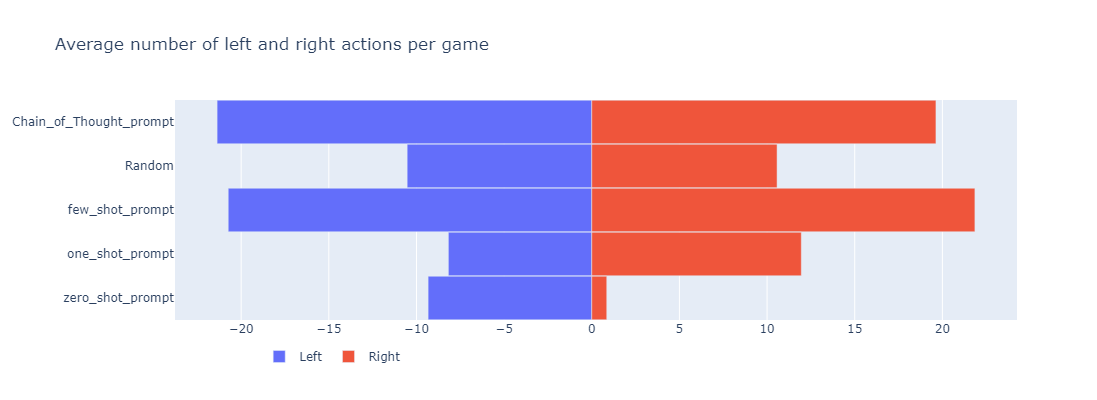

In [68]:
grouped_df = dfCartPoleLLM.groupby(['promptKey']).mean(numeric_only=True).reset_index()

fig = go.Figure()

fig.add_trace(go.Bar(x=-grouped_df['leftActions'].values,
                        y=grouped_df['promptKey'],
                        orientation='h',
                        name='Left',
                        customdata=grouped_df['rewards']))

fig.add_trace(go.Bar(x=grouped_df['rightActions'].values,
                        y=grouped_df['promptKey'],
                        orientation='h',
                        name='Right',
                        customdata=grouped_df['rewards']))

fig.update_layout(barmode='relative', 
                  height=400, 
                  width=700, 
                  yaxis_autorange='reversed',
                  bargap=0.01,
                  legend_orientation ='h',
                  legend_x=0.10, legend_y=-0.1,
                  title="Average number of left and right actions per game"
                 )
fig.show()

In [69]:
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

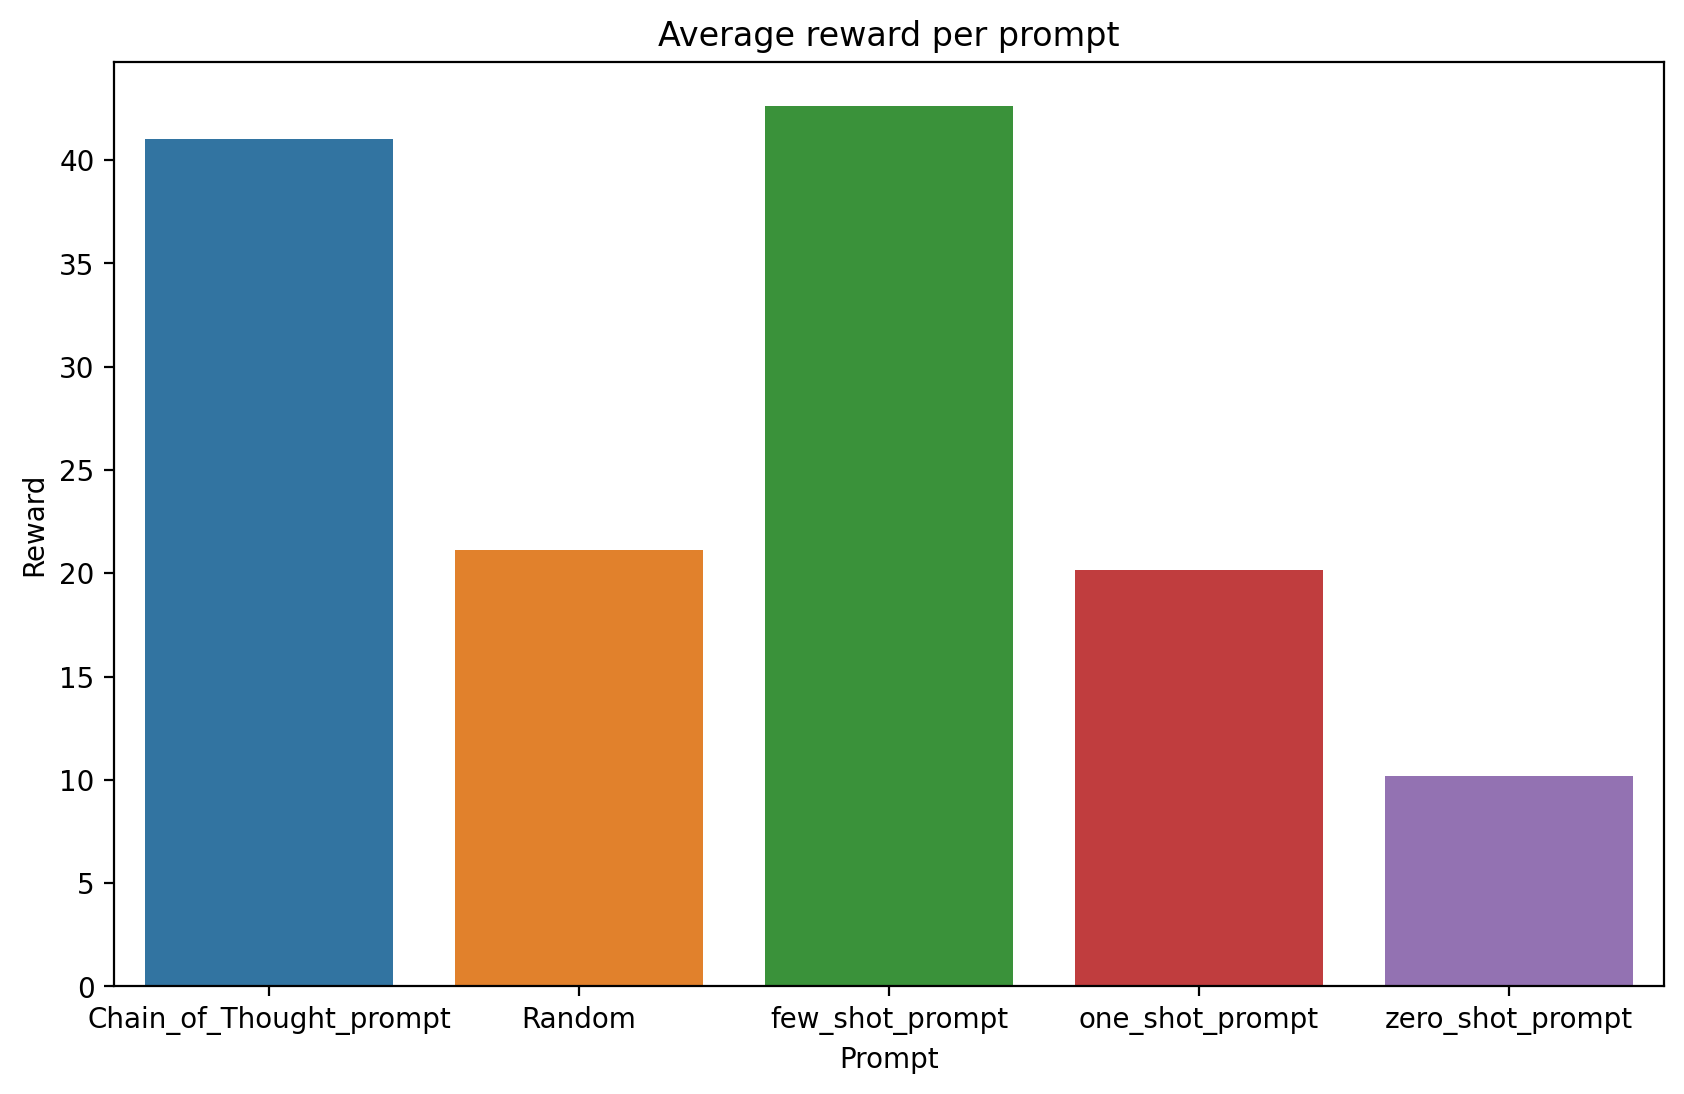

In [70]:
# Group by temperature and prompt, then take the average rewards
grouped_df = dfCartPoleLLM.groupby(['promptKey']).mean(numeric_only=True).reset_index()

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='promptKey', y='rewards', hue='promptKey', data=grouped_df, palette=sns.color_palette())
plt.title('Average reward per prompt')
plt.xlabel('Prompt')
plt.ylabel('Reward')

#plt.legend(title='Prompt')
plt.show()

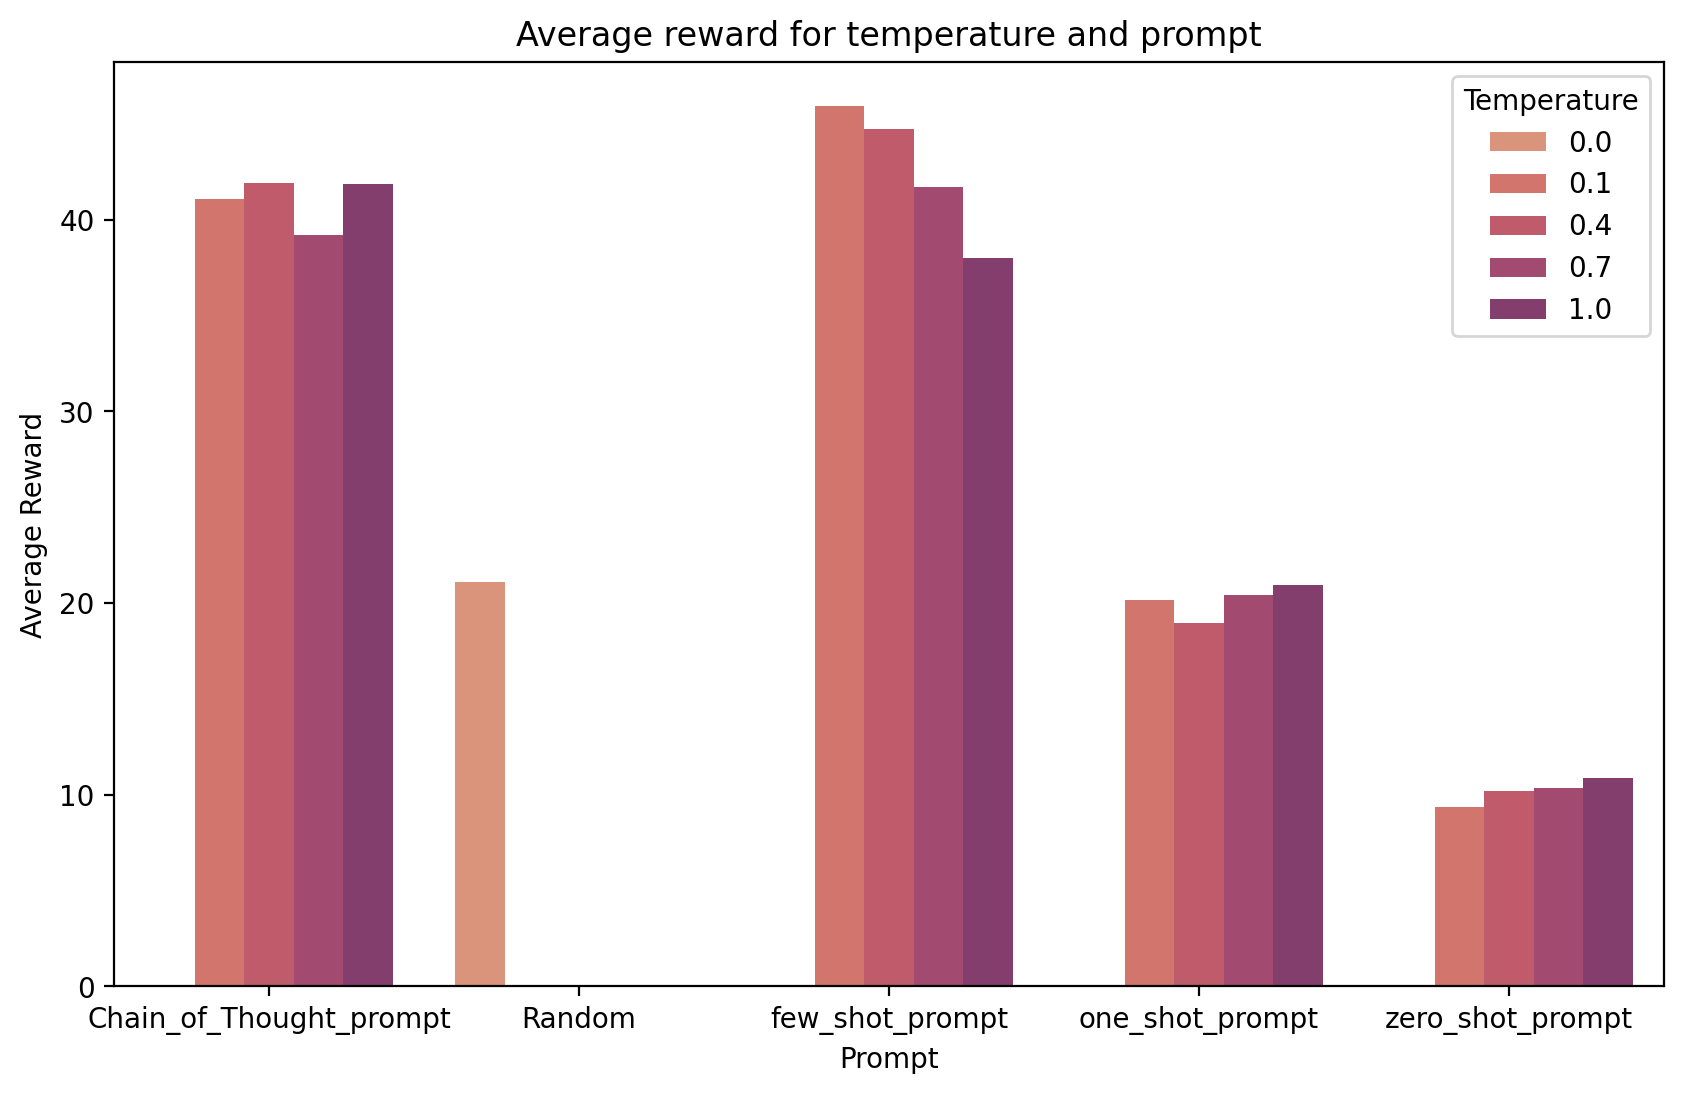

In [71]:
# Group by temperature and prompt, then sum the rewards
grouped_df = dfCartPoleLLM.groupby(['promptKey', 'temperature']).mean(numeric_only=True).reset_index()

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='promptKey', y='rewards', hue='temperature', data=grouped_df, palette=sns.color_palette("flare"))
plt.title('Average reward for temperature and prompt')
plt.xlabel('Prompt')
plt.ylabel('Average Reward')

plt.legend(title='Temperature')
plt.show()

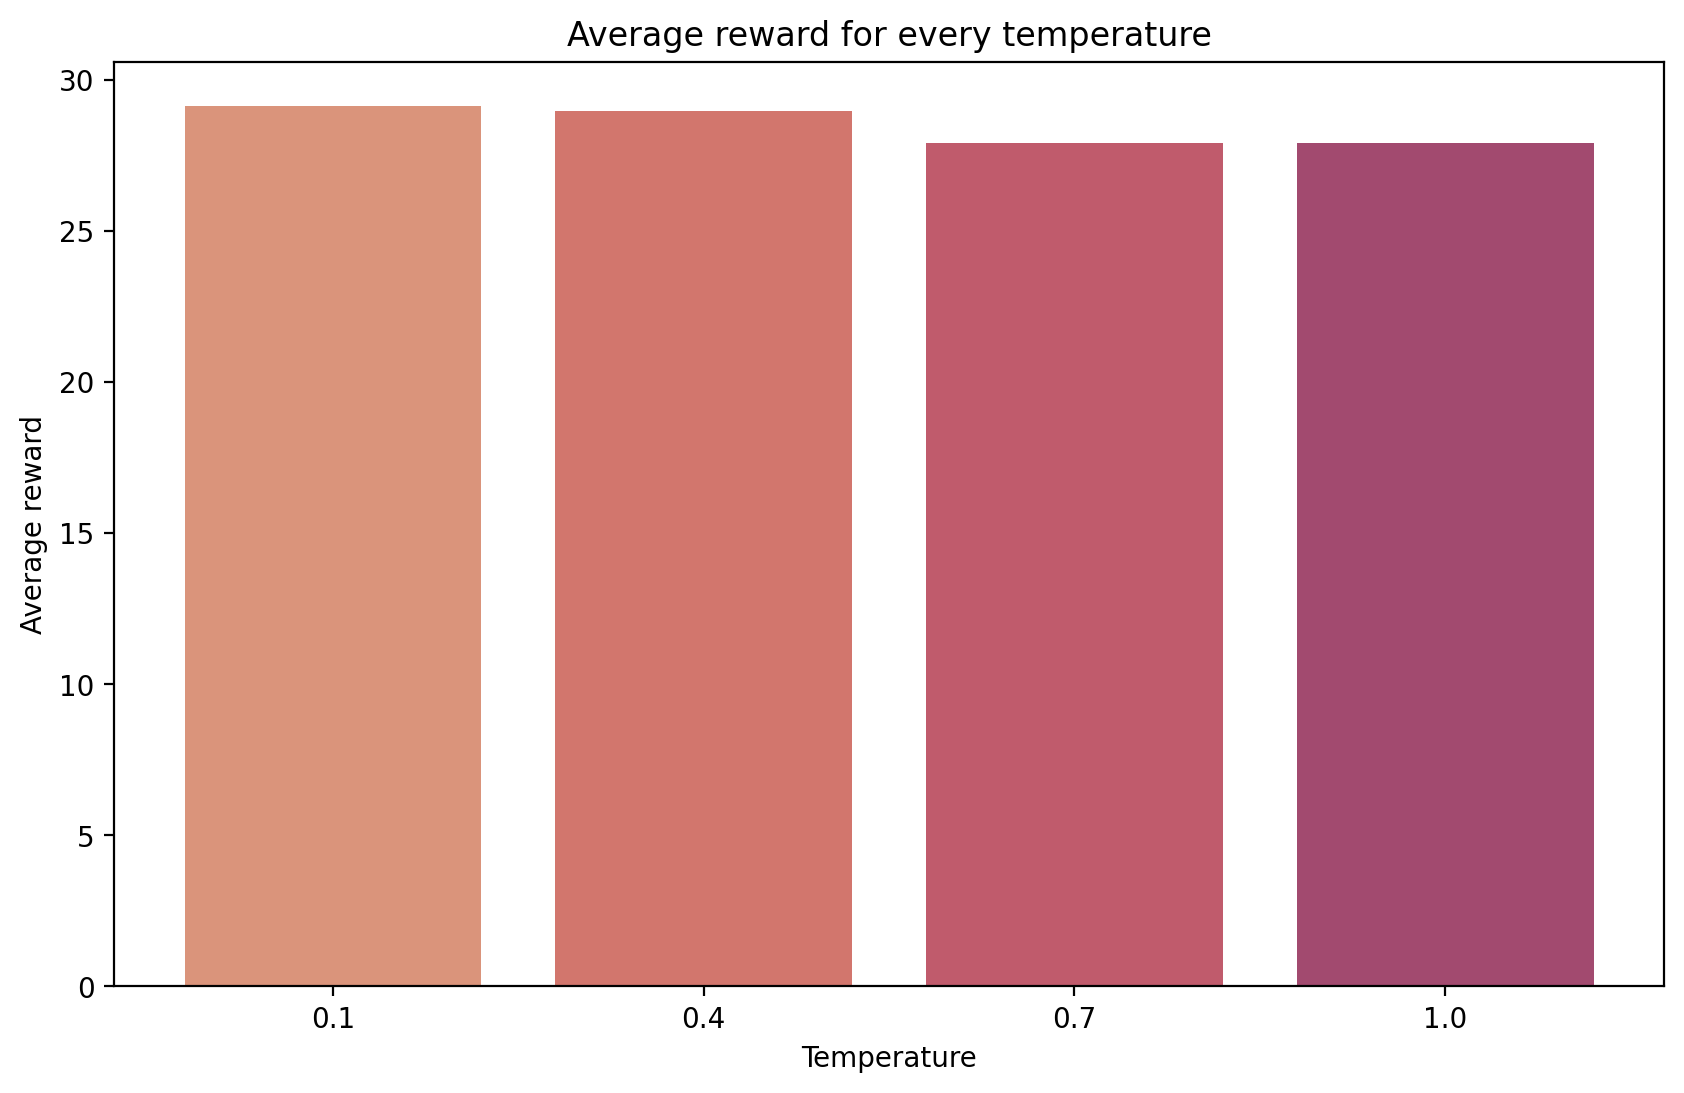

In [72]:
grouped_df = dfCartPoleLLM[dfCartPoleLLM['promptKey'] != "Random"] .groupby(['temperature']).mean(numeric_only=True).reset_index()

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='temperature', y='rewards', data=grouped_df, palette=sns.color_palette("flare"), order=grouped_df['temperature'])
plt.title('Average reward for every temperature')
plt.xlabel('Temperature')
plt.ylabel('Average reward')
plt.plot(legend=False)
plt.show()